#**Entrega Final Proyecto IA 1**

#**Análisis de la calidad del vino blanco con IA**

## **Integrantes**
1. Daniel Sebastiás Badillo Neira - 2220071
2. Juan David Pallares Pallares - 2220079

## **Outline**
1. Motivación.
2. Objetivo.
3. Información del dataset.
4. Procesamiento.
5. ML.
6. DL.

## Plus Entrega final

7. K-Means.
8. DBScan
9. Resultados.

In [ ]:
#@title Librerias
# Librerías generales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Tensorflow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Google Colab (solo si estás en Colab)
from google.colab import drive




## **1. Motivación**

La inteligencia artificial se ha convertido en una herramienta clave para resolver problemas en distintas áreas, permitiendo analizar grandes cantidades de datos y encontrar patrones que de otra manera serían difíciles de detectar. Dentro de este campo, el Machine Learning (ML) y el Deep Learning (DL) ofrecen enfoques que, aunque diferentes, buscan alcanzar el mismo objetivo: realizar predicciones que se ajusten a partir de datos.

En este proyecto se busca explorar y comparar distintos modelos de aprendizaje supervisado de ML y DL, como también algoritmos de aprendizaje no supervisado como K-Means y DBScan aplicados a la predicción de la calidad del vino. Se pretende observar cómo se comportan ante diferentes condiciones, analizar su capacidad para generalizar, y evaluar su efectividad en un problema de clasificación con datos reales.

El propósito es analizar el comportamiento de los modelos, identificar sus fortalezas, reconocer sus límites, y entender en qué situaciones es más conveniente utilizar cada uno. De esta forma, se busca comprender no solo el funcionamiento de estas técnicas, sino también sus alcances prácticos en la resolución de problemas concretos.

## **2. Objetivos**

###**Objetivo general**
Desarrollar varios modelos de IA, tanto supervisados como no supervisados que predigan la calidad del vino, utilizando técnicas de Machine Learning (ML) y Deep Learning (DL) y comparando su desempeño.

###**Objetivos específicos**
- Explorar y analizar el dataset para identificar patrones y relaciones entre las variables que más tengan impacto en la calidad del vino.

- Entrenar y evaluar diferentes modelos de Machine Learning, como Gaussian Naive Bayes, Random Forest y SVM, para predecir la calidad del vino. Comparar el rendimiento de los modelos utilizando métricas como la precisión, la matriz de confusión y el reporte de clasificación.

- Implementar y evaluar modelos de Deep Learning, como redes neuronales profundas, para la predicción de la calidad del vino. Ajustar la arquitectura del modelo, los hiperparámetros y las técnicas de regularización para optimizar el rendimiento.

- Utilizar los algoritmos de aprendizaje no supervisado de K-Means y DBScan para agrupar los distintos tipos de vino basandose en sus características fisicoquímicas y observar si estos clusteres corresponden a si efectivamente es un buen o mal vino.

## **3. Información del dataset**

In [ ]:
#@title Conexión al datset
file_path = 'https://drive.google.com/uc?id=1oJ5yloiovDKW6n594txUtOkJl_EhfKG-'
df = pd.read_csv(file_path, delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#@title Analisis General
print(df.describe().round(2))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    4898.00              4898.00               4898.00  4898.00  4898.00   
mean        0.05                35.31                138.36     0.99     3.19   
std         0.02                17.01                 42.50     0.00     0.15   
min         0.01                 2.0

In [ ]:
#@title Verifica si hay datos nulos
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


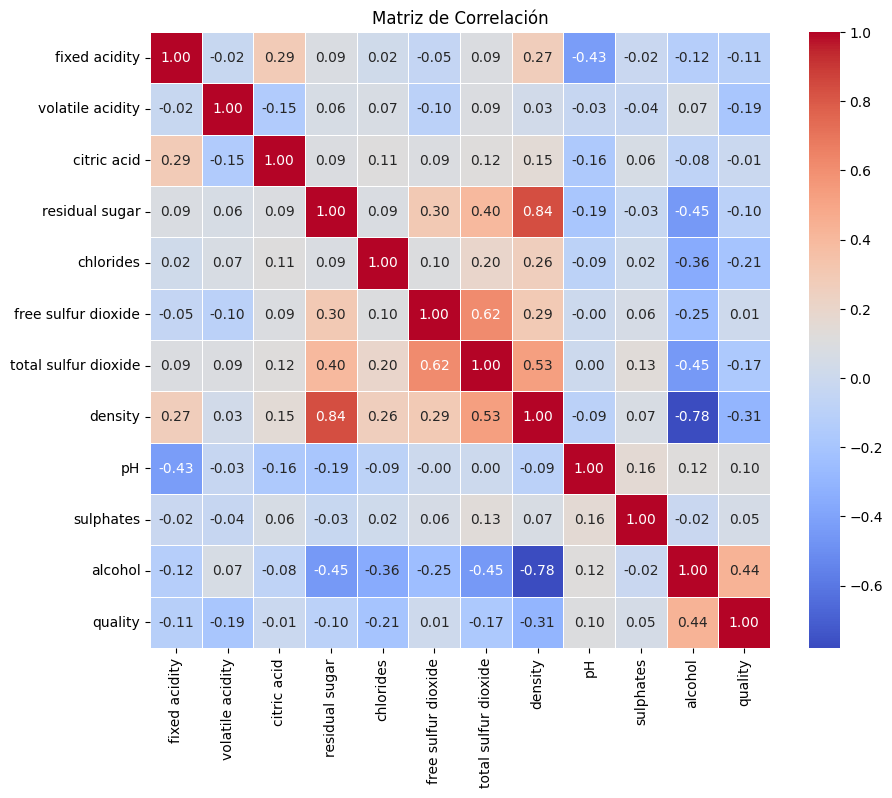

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

## **4. Procesamiento**

<ipython-input-7-9c7e40218bb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


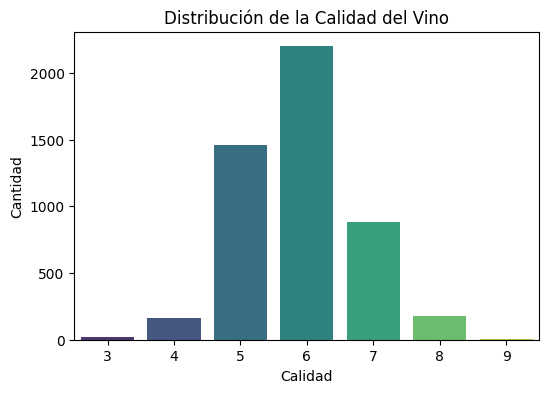

In [ ]:
#@title Distribución de quality

plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Cantidad')
plt.show()

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


<ipython-input-8-cfea46e87e7c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


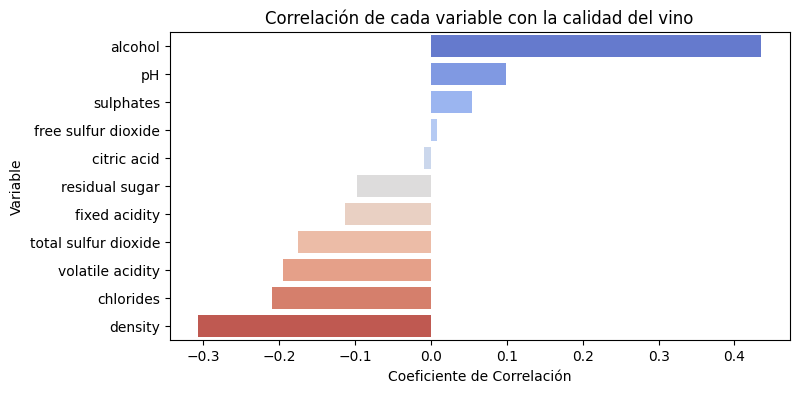

In [ ]:
#@title Features más relacionados con quality
correlaciones = df.corr()['quality'].sort_values(ascending=False)
print(correlaciones)

corr = correlaciones.drop('quality')

#Gráfica
plt.figure(figsize=(8,4))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlación de cada variable con la calidad del vino')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variable')
plt.show()

**Características seleccionadas para el entrenamiento**

Con ayuda de la gráfica anterior se seleccionaron aquellas features cuyo coeficiente de relación con la variable quality fue menor a -0.1 y mayor a 0.05. Por lo que estas son:

- alcohol
- pH
- sulphates
- residual sugar
- fixed acidity
- total sulfur dioxide
- volatile acidity
- chlorides
- density

In [ ]:
#@title Clasificar vino según calidad
# Para mejorar el preprocesamiento, se va a clasificar un vino según si es buen vino o mal vino
# aquellos que tengan más de 5 en calidad serán clasificados como un buen vino, aquellos con 5 o menos serán clasificados como mal vino

df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [ ]:
df['quality_binary'].value_counts()

,count
quality_binary,
1,3258
0,1640


In [ ]:
#@title Train test split

d = df.copy()

d.drop(['free sulfur dioxide', 'citric acid'], axis=1, inplace=True)

X = d.drop(['quality', 'quality_binary'], axis=1).values
y = d['quality_binary'].values

# X = d.drop('quality', axis=1).values
# y = d['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 9), (980, 9), (3918,), (980,))

**Normalizar los datos**

$$
X_u = \frac{X - μ}{σ}
$$

In [ ]:
#@title Escalamiento de los datos

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Para cada columna (Solo se usan datos del entrenamiento)
num_cols = X_train.shape[1]

for col in range(num_cols):
    # Media y desviación estanadar
    mean = X_train[:, col].mean()
    std = X_train[:, col].std()

    # Escalamos train y test
    X_train_scaled[col] = (X_train[col] - mean) / std
    X_test_scaled[col] = (X_test[col] - mean) / std

# Aprendizaje supervisado

## **5. ML**

### Gaussian Naive Bayes

In [ ]:
# Entrenamiento y predicción usando el modelo Gaussian Naive Bayes:
# - Se crea una instancia del modelo.
# - Se entrena con los datos de entrenamiento (X_train, y_train).
# - Se generan predicciones sobre el conjunto de prueba (X_test).

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.71


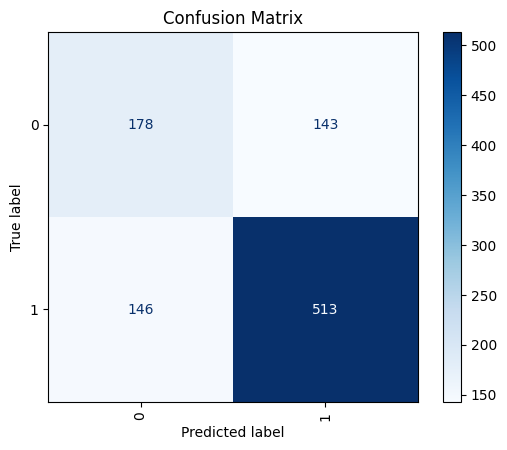

In [ ]:
# Evaluación del modelo:
# - Se calcula el accuracy del conjunto de prueba.
# - Se genera y grafica la matriz de confusión para visualizar el desempeño por clase.

# Calcular accuracy
accuracy_NB = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_NB:.2f}")

# Obtener las clases realmente usadas
labels = np.unique(np.concatenate((y_test, y_pred)))

# Calcular y graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Validación cruzada del modelo:
# - Se realiza un K-Fold Cross Validation con 5 particiones.
# - Se calcula el accuracy promedio y su desviación estándar para evaluar la estabilidad del modelo.

cross_val_score_NB = cross_val_score(model, X_train_scaled, y_train, cv=KFold(10, shuffle=True))
print("Accuracy promedio: %.3f (+/- %.5f)" % (np.mean(cross_val_score_NB), np.std(cross_val_score_NB)))



Accuracy promedio: 0.338 (+/- 0.01889)


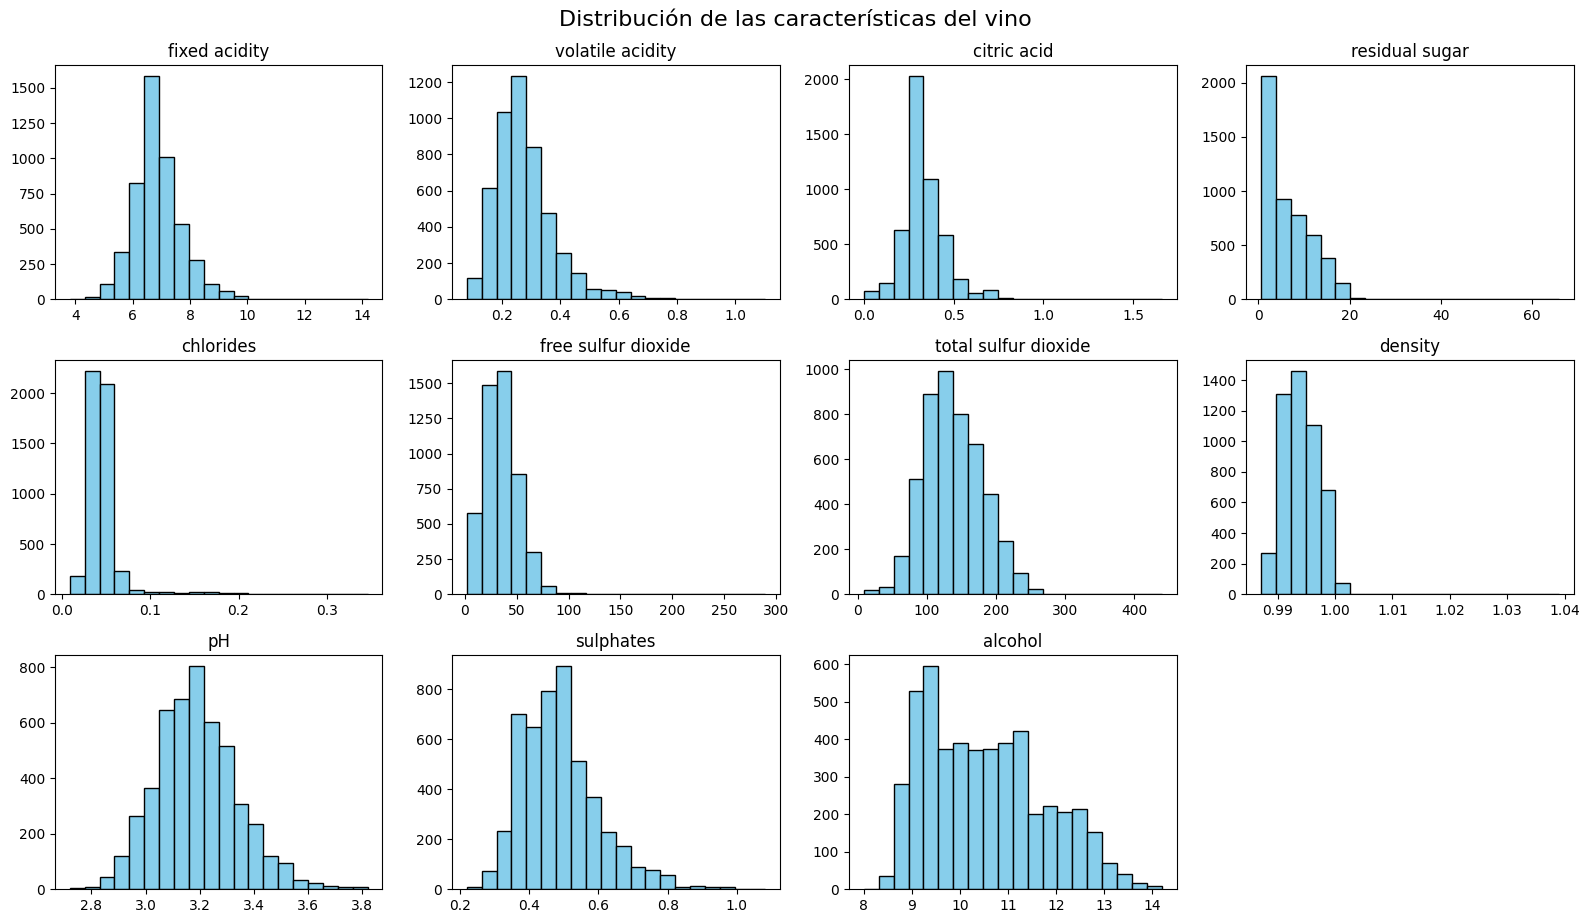

In [ ]:
features = df.drop(['quality', 'quality_binary'], axis=1)
n_cols = 4
n_rows = -(-len(features.columns) // n_cols)


plt.figure(figsize=(n_cols*4, n_rows*3))

for i, col in enumerate(features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(features[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Distribución de las características del vino', fontsize=16, y=1.02)
plt.show()

### Random Forest

In [ ]:
#@title Modelo
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
accuracy_rf = accuracy_score(rf.predict(X_test), y_test)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.82


In [ ]:
#@title cross_val_score
cross_val_score_rf = cross_val_score(rf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
cross_val_score_rf
print("accuracy %.3f (+/- %.5f)"%(np.mean(cross_val_score_rf), np.std(cross_val_score_rf)))

accuracy 0.836 (+/- 0.01732)


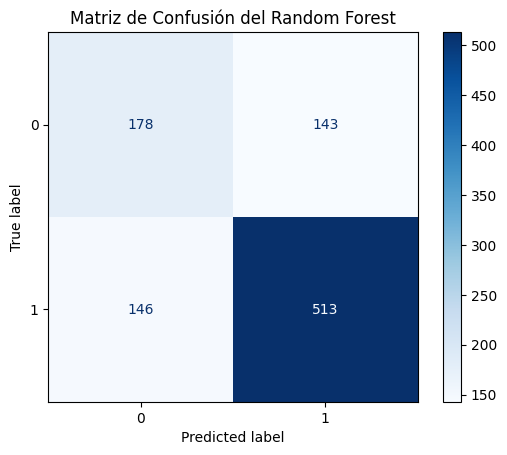

In [ ]:
#@title Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
labels_presentes = np.unique(np.concatenate((y_test, y_pred)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión del Random Forest')
plt.show()

In [ ]:
#@title Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       321
           1       0.78      0.78      0.78       659

    accuracy                           0.71       980
   macro avg       0.67      0.67      0.67       980
weighted avg       0.71      0.71      0.71       980



### SVM

In [ ]:
#@title Modelo
from sklearn.svm import LinearSVC

# svc = SVC(kernel='rbf', random_state=42)
svc = LinearSVC(random_state=42, max_iter=10000)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svc:.2f}")

Accuracy: 0.74


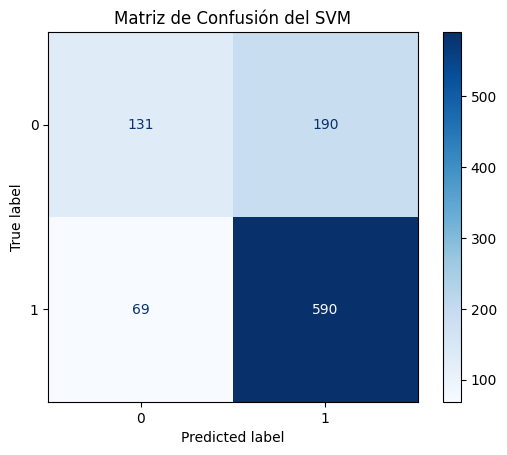

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels_presentes = np.unique(np.concatenate((y_test, y_pred)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión del SVM')
plt.show()

In [ ]:
#@title Cross Validation
cross_val_score_svc = cross_val_score(svc, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(cross_val_score_svc), np.std(cross_val_score_svc)))

accuracy 0.752 (+/- 0.02621)


In [ ]:
#@title Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.50       321
           1       0.76      0.90      0.82       659

    accuracy                           0.74       980
   macro avg       0.71      0.65      0.66       980
weighted avg       0.72      0.74      0.72       980



### Comparación de resultados

In [ ]:
resultados = pd.DataFrame({
    'Modelo': ['Random Forest', 'Linear SVC', 'GaussianNB'],
    'Accuracy': [accuracy_rf, accuracy_svc, accuracy_NB],
    'Accuracy Cross Validation': [np.mean(cross_val_score_rf), np.mean(cross_val_score_svc), np.mean(cross_val_score_NB)]
})

resultados

,Modelo,Accuracy,Accuracy Cross Validation
0,Random Forest,0.823469,0.836257
1,Linear SVC,0.735714,0.752343
2,GaussianNB,0.705102,0.337918


## **6. DL**

### Modelo 1

In [ ]:
#@title Construcción y Entrenamiento del Modelo de Deep Learning
# Creación, compilación y entrenamiento del modelo de Deep Learning:
# - Se codifican las etiquetas (Label Encoding + One-Hot Encoding).
# - Se construye una red neuronal profunda con múltiples capas densas y normalización.
# - Se compila el modelo usando Adam y categorical crossentropy.
# - Se entrena el modelo con early stopping para evitar overfitting.

# Codificación de etiquetas
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Número de clases
num_classes = len(encoder.classes_)

# One-Hot Encoding
y_train_ohe = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_ohe = to_categorical(y_test_encoded, num_classes=num_classes)

# Definición del modelo
model = Sequential([
    Flatten(input_shape=X_train_scaled[0].shape),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Salida para multi-clase
])

# Compilación
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Entrenamiento
#model.fit(X_train_scaled, y_train_ohe, epochs=10, batch_size=40, callbacks=[early_stopping], validation_data=(X_test_scaled, y_test_ohe))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6819 - loss: 0.5993 - val_accuracy: 0.6633 - val_loss: 0.6275
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7005 - loss: 0.5534 - val_accuracy: 0.6633 - val_loss: 0.6288
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7137 - loss: 0.5516 - val_accuracy: 0.6633 - val_loss: 0.6285
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7444 - loss: 0.5254 - val_accuracy: 0.6633 - val_loss: 0.6262
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7275 - loss: 0.5212 - val_accuracy: 0.6633 - val_loss: 0.6253
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7420 - loss: 0.5190 - val_accuracy: 0.6620 - val_loss: 0.6322
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7294 - loss: 0.5167 - val_accuracy: 0.6633 - val_loss: 0.6295
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7341 - loss: 0.5174 - val_accuracy: 0.6633

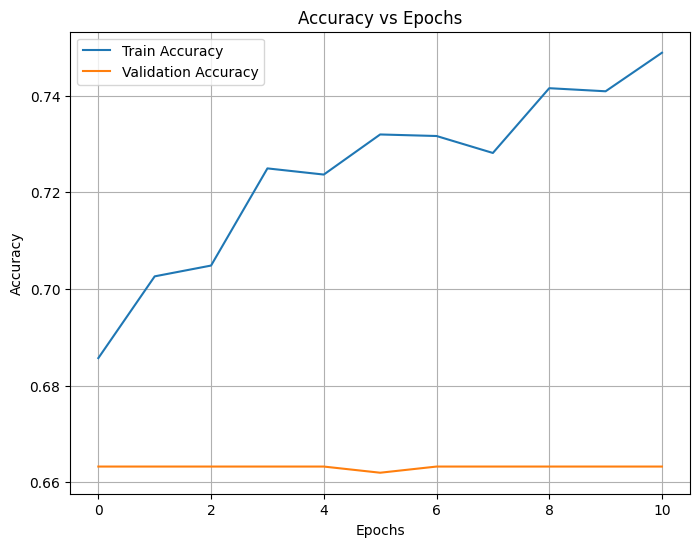

In [ ]:
# Entrenamiento del modelo y visualización de la evolución de la accuracy:
# - Se entrena el modelo utilizando datos de entrenamiento y validación.
# - Se grafica la precisión de entrenamiento y validación a lo largo de las épocas.

# Entrenamiento
history = model.fit(X_train_scaled, y_train_ohe, epochs=100, batch_size=40, validation_split=0.2, callbacks=[early_stopping])
# Gráfica de la evolución de la accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluación final del modelo sobre el conjunto de prueba:
# - Se calcula la pérdida (loss) y la precisión (accuracy) utilizando los datos de prueba escalados.

test_loss, test_acc = model.evaluate(X_test_scaled, y_test_ohe)
print('Test accuracy:', test_acc, " Test loss:", test_loss)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6674 - loss: 0.6723
Test accuracy: 0.6744897961616516  Test loss: 0.6318981647491455


# Aprendizaje no supervisado

## **7. K-Means**

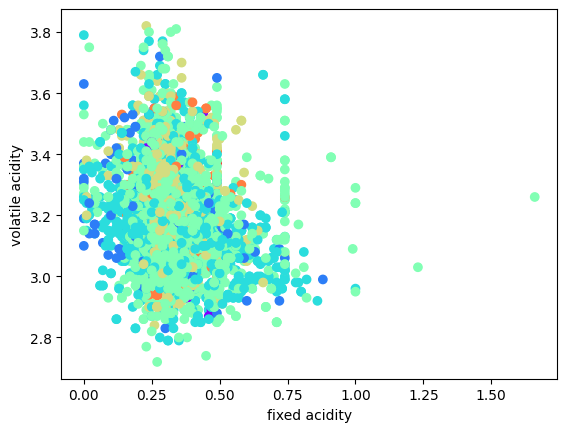

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='rainbow');
plt.xlabel("fixed acidity"); plt.ylabel("volatile acidity")
y = df['quality_binary']
X = df.drop(['quality', 'quality_binary'], axis=1)
# Estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

(3, 11)
[2 0 1 ... 1 0 0]


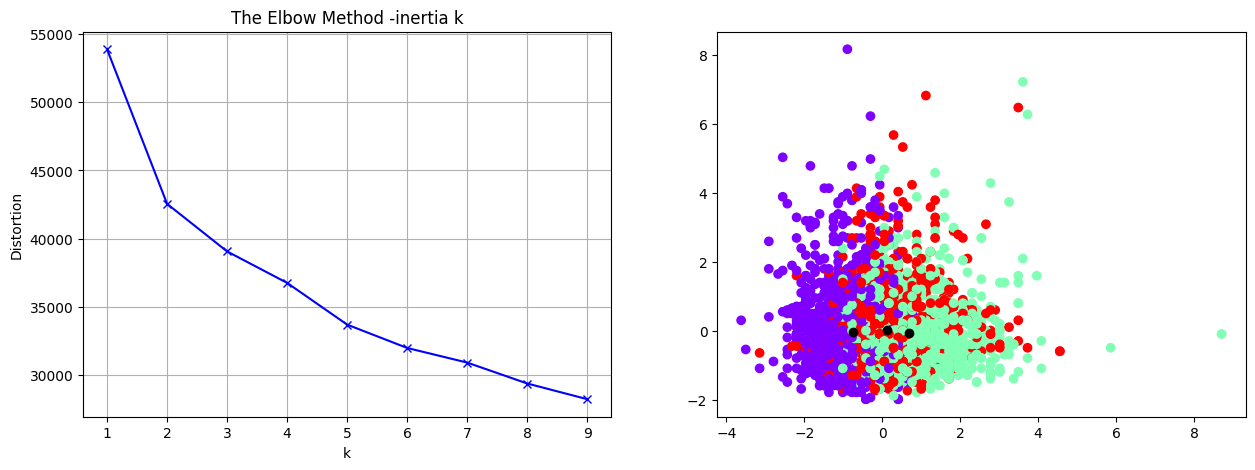

In [ ]:
#@title Elbow method

wss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto', random_state=21) #.fit(X)
    kmeanModel.fit(X)
    wss.append(kmeanModel.inertia_)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(K, wss, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method -inertia k')
plt.grid()

#Kmeans con tres clusters
plt.subplot(122)
kmeanModel = KMeans(n_clusters=3, n_init='auto', random_state=21).fit(X)
kmeanModel.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeanModel.labels_, cmap='rainbow');
plt.scatter(kmeanModel.cluster_centers_[:,0] ,kmeanModel.cluster_centers_[:,1], color='black')

print(kmeanModel.cluster_centers_.shape)
print(kmeanModel.labels_)

Basándonos en la gráfica, el número de clusters k adecuado serían 2 o 3.

In [ ]:
acc3 = accuracy_score(y, kmeanModel.labels_)
print(f"Accuracy: {acc3:.2f}")

Accuracy: 0.27


In [ ]:
#@title Kmeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=27)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(y)

[[ 0.17142705  0.04796801  0.22967222  0.85446564  0.39680731  0.60341347
   0.77157464  0.95176473 -0.19902472  0.06096371 -0.79249509]
 [-0.11300712 -0.03162119 -0.15140316 -0.56327579 -0.26158097 -0.39777866
  -0.50863288 -0.62741672  0.1311999  -0.04018813  0.52242393]]
[0 1 1 ... 1 1 1]
0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality_binary, Length: 4898, dtype: int64


(2, 11)
(4898,)


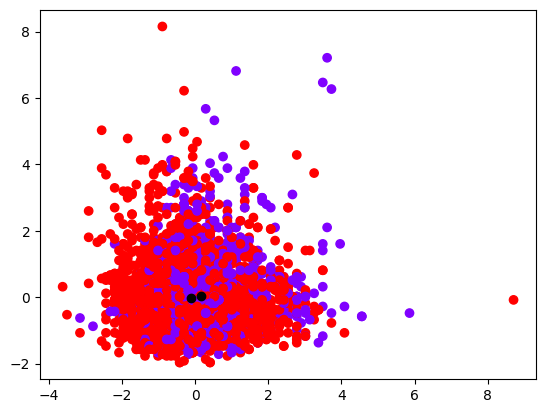

In [ ]:
#@title Gráfica dos clusters
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print(kmeans.cluster_centers_.shape)
print(kmeans.labels_.shape)

In [ ]:
#@title Accuracy
acc2 = accuracy_score(y, kmeans.labels_)
print(f"Accuracy: {acc2:.2f}")
print(classification_report(y, kmeans.labels_))

Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.47      0.55      0.51      1640
           1       0.75      0.68      0.71      3258

    accuracy                           0.64      4898
   macro avg       0.61      0.62      0.61      4898
weighted avg       0.66      0.64      0.65      4898



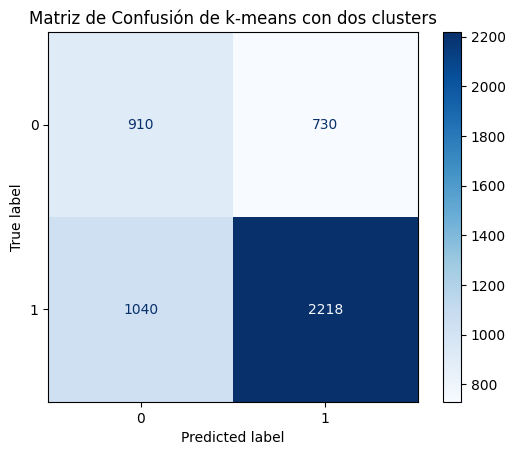

In [ ]:
#@title Matriz de confusión

cm = confusion_matrix(y, kmeans.labels_)
labels_presentes = np.unique(np.concatenate((y, kmeans.labels_)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_presentes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión de k-means con dos clusters')
plt.show()

In [ ]:
#@title TSNE y PCA
pca = PCA(n_components= 2, whiten=True)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, learning_rate='auto')
X_tsne = tsne.fit_transform(X)

X:  (4898, 11)  X_pca:  (4898, 2)  X_tsne:  (4898, 2)
AccuracyPCA: 0.37
              precision    recall  f1-score   support

           0       0.25      0.44      0.32      1640
           1       0.54      0.33      0.41      3258

    accuracy                           0.37      4898
   macro avg       0.40      0.39      0.37      4898
weighted avg       0.44      0.37      0.38      4898

AccuracyTSNE: 0.34
              precision    recall  f1-score   support

           0       0.21      0.35      0.26      1640
           1       0.50      0.33      0.40      3258

    accuracy                           0.34      4898
   macro avg       0.35      0.34      0.33      4898
weighted avg       0.40      0.34      0.35      4898



Text(0, 0.5, 'tsne 2')

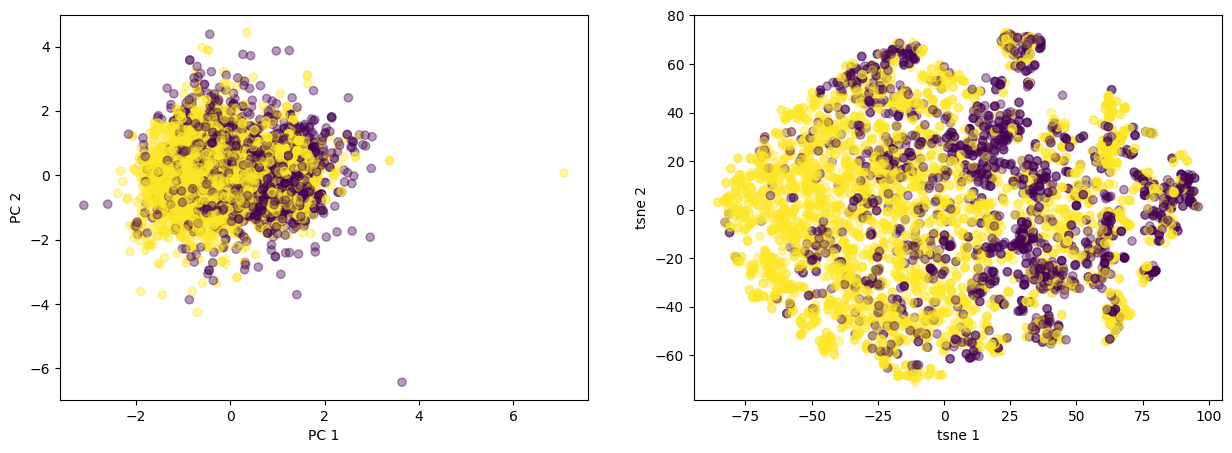

In [ ]:
print('X: ', X.shape, ' X_pca: ', X_pca.shape, ' X_tsne: ', X_tsne.shape)

kmeanPCA = KMeans(n_clusters=2, random_state=21)
kmeanPCA.fit(X_pca)
acc30 = accuracy_score(y, kmeanPCA.labels_)
print(f"AccuracyPCA: {acc30:.2f}")
print(classification_report(y, kmeanPCA.labels_))

kmeanTSNE = KMeans(n_clusters=2, random_state=21)
kmeanTSNE.fit(X_tsne)
accTSNE = accuracy_score(y, kmeanTSNE.labels_)
print(f"AccuracyTSNE: {accTSNE:.2f}")
print(classification_report(y, kmeanTSNE.labels_))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, alpha=0.4)
plt.xlabel("PC 1"); plt.ylabel("PC 2")
plt.subplot(122)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y, alpha=0.4)
plt.xlabel("tsne 1"); plt.ylabel("tsne 2")

## **8. DBScan**

In [ ]:
df = pd.read_csv(file_path, delimiter=';')
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
y = df['quality_binary']
X = df.drop(['quality', 'quality_binary'], axis=1)

# Estandarizar datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(scaled_features)

print(np.unique(dbscan.labels_))
accuracy = accuracy_score(y, dbscan.labels_)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y, dbscan.labels_))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Accuracy: 0.24
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.31      0.73      0.43      1640
           1       0.00      0.00      0.00      3258
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0

    accuracy                           0.24      4898
   macro avg      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#@title Reducción de dimensionalidad

pca_wine = PCA(n_components= 2, whiten=True)
X_pca = pca_wine.fit_transform(scaled_features)

tsne_wine = TSNE(n_components=2, learning_rate='auto')
X_tsne = tsne_wine.fit_transform(scaled_features)

Text(0, 0.5, 'tsne 2')

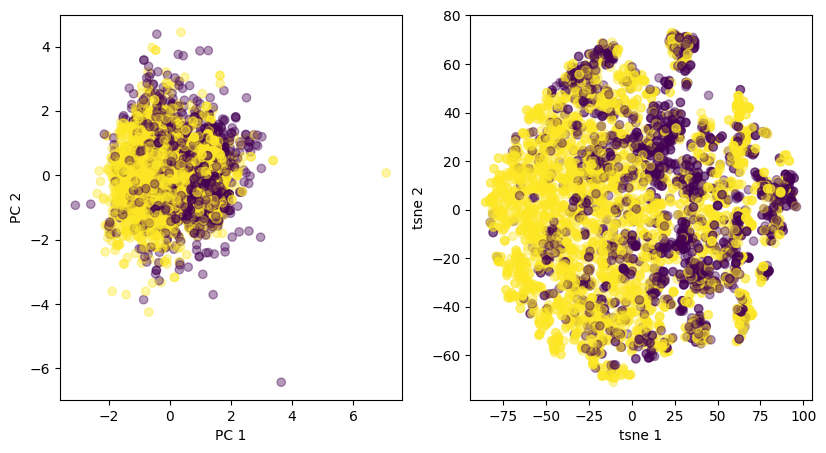

In [ ]:
#@title Gráficas

plt.figure(figsize=(15,5))
plt.subplot(132)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, alpha=0.4)
plt.xlabel("PC 1"); plt.ylabel("PC 2")
plt.subplot(133)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y, alpha=0.4)
plt.xlabel("tsne 1"); plt.ylabel("tsne 2")

In [ ]:
#@title DBSCAN sobre PCA y TSNE
from collections import Counter

# DBSCAN sobre PCA
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar eps
labels_pca = dbscan_pca.fit_predict(X_pca)
print("PCA Clusters:", np.unique(labels_pca))
print("PCA Label Count:", Counter(labels_pca))

# DBSCAN sobre t-SNE
dbscan_tsne = DBSCAN(eps=5, min_samples=5)  # t-SNE suele requerir mayor eps
labels_tsne = dbscan_tsne.fit_predict(X_tsne)
print("t-SNE Clusters:", np.unique(labels_tsne))
print("t-SNE Label Count:", Counter(labels_tsne))

PCA Clusters: [-1  0]
PCA Label Count: Counter({np.int64(0): 4876, np.int64(-1): 22})
t-SNE Clusters: [-1  0  1  2  3  4  5]
t-SNE Label Count: Counter({np.int64(0): 4619, np.int64(3): 122, np.int64(1): 76, np.int64(2): 37, np.int64(4): 30, np.int64(5): 12, np.int64(-1): 2})


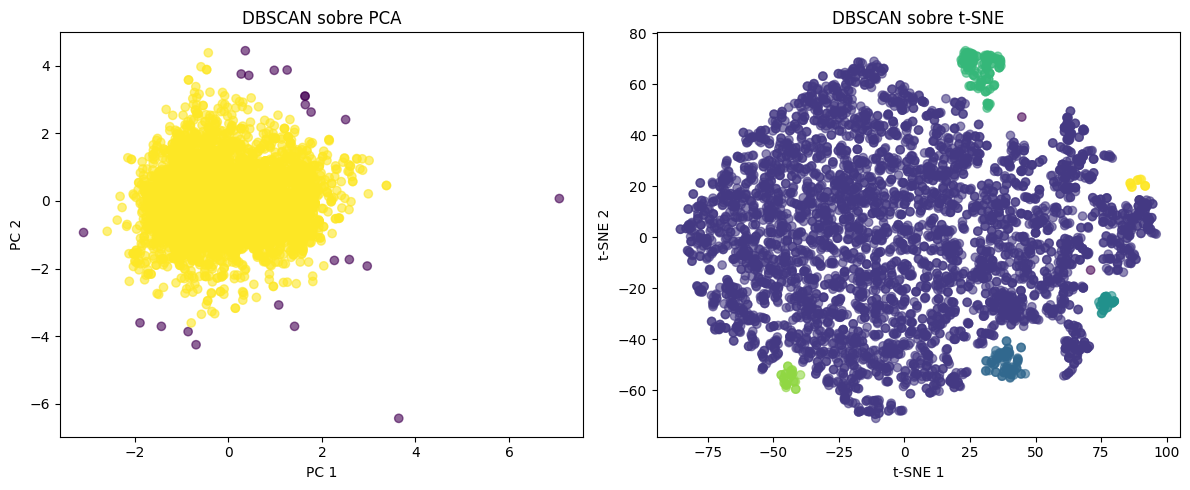

In [ ]:
#@title Gráficas DBSCAN sobre PCA y TSNE

plt.figure(figsize=(12,5))

# Clusters en PCA
plt.subplot(121)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_pca, cmap='viridis', alpha=0.6)
plt.title("DBSCAN sobre PCA")
plt.xlabel("PC 1"); plt.ylabel("PC 2")

# Clusters en t-SNE
plt.subplot(122)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_tsne, cmap='viridis', alpha=0.6)
plt.title("DBSCAN sobre t-SNE")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

plt.tight_layout()
plt.tight_layout()
plt.show()

In [ ]:
#@title PCA DBSCAN Report
accuracy_dbscan_pca = accuracy_score(y, dbscan_pca.labels_)
print(accuracy_dbscan_pca)
print(classification_report(y, dbscan_pca.labels_))

0.3319722335647203
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.33      0.99      0.50      1640
           1       0.00      0.00      0.00      3258

    accuracy                           0.33      4898
   macro avg       0.11      0.33      0.17      4898
weighted avg       0.11      0.33      0.17      4898



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
#@title TSNE DBSCAN Report
accuracy_dbscan_tsne = accuracy_score(y, dbscan_tsne.labels_)
print(accuracy_dbscan_tsne)
print(classification_report(y, dbscan_tsne.labels_))

0.31318905675786035
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.33      0.92      0.48      1640
           1       0.41      0.01      0.02      3258
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.31      4898
   macro avg       0.10      0.13      0.07      4898
weighted avg       0.38      0.31      0.17      4898



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **9. Resultados**

In [ ]:
#Creamos un DataFrame para almacenar los resultados
resultados_finales = pd.DataFrame({
    'Modelo': [],
    'Accuracy': [],
    'Accuracy Cross Validation': [],
    'Test Loss': []
})

#resultados de Machine Learning
resultados_ml = pd.DataFrame({
    'Modelo': ['Random Forest', 'Linear SVC', 'GaussianNB'],
    'Accuracy': [accuracy_rf, accuracy_svc, accuracy_NB],
    'Accuracy Cross Validation': [np.mean(cross_val_score_rf), np.mean(cross_val_score_svc), np.mean(cross_val_score_NB)],
    'Test Loss': [np.nan, np.nan, np.nan] # ML models don't typically have a 'test_loss' in the same way as DL
})

resultados_finales = pd.concat([resultados_finales, resultados_ml], ignore_index=True)

#resultados de Deep Learning 1
resultados_dl1 = pd.DataFrame({
    'Modelo': ['DL'],
    'Accuracy': [test_acc],
    'Accuracy Cross Validation': [np.nan],
    'Test Loss': [test_loss]
})

resultados_finales = pd.concat([resultados_finales, resultados_dl1], ignore_index=True)


# #resultados de Deep Learning 2
# resultados_dl2 = pd.DataFrame({
#     'Modelo': ['DL con agrupacion'],
#     'Accuracy': [test_acc_dl2],
#     'Accuracy Cross Validation': [np.nan],
#     'Test Loss': [test_loss] # Asumiendo que test_loss del segundo modelo se llama igual. Si no, usa el nombre correcto.
# })

# resultados_finales = pd.concat([resultados_finales, resultados_dl2], ignore_index=True)


#Agregamos resultados de K-Means
#Para K-Means, las métricas de clasificación (Accuracy, Classification Report) se calculan comparando los labels del clustering
#con los labels originales (en este caso 'quality_binary').
#No hay 'Test Loss' o 'Cross Validation' en el sentido supervisado tradicional.
resultados_kmeans = pd.DataFrame({
    'Modelo': ['KMeans (k=3)', 'KMeans (k=2)', 'KMeans PCA', 'KMeans TSNE'],
    'Accuracy': [acc3, acc2, acc30, accTSNE],
    'Accuracy Cross Validation': [np.nan, np.nan, np.nan, np.nan],
    'Test Loss': [np.nan, np.nan, np.nan, np.nan]
})

resultados_finales = pd.concat([resultados_finales, resultados_kmeans], ignore_index=True)


#Agregamos resultados de DBSCAN
# Similar a K-Means, las métricas se calculan comparando los labels del clustering con los labels originales.
# Asegúrate de usar las variables de accuracy correctas que obtuviste para DBSCAN.
resultados_dbscan = pd.DataFrame({
    'Modelo': ['DBSCAN', 'DBSCAN PCA', 'DBSCAN TSNE'],
    'Accuracy': [accuracy, accuracy_dbscan_pca, accuracy_dbscan_tsne], # Reemplaza 'accuracy' con las variables correctas para cada caso
    'Accuracy Cross Validation': [np.nan, np.nan, np.nan],
    'Test Loss': [np.nan, np.nan, np.nan]
})

resultados_finales = pd.concat([resultados_finales, resultados_dbscan], ignore_index=True)
print(resultados_finales)

           Modelo  Accuracy  Accuracy Cross Validation  Test Loss
0   Random Forest  0.823469                   0.836257        NaN
1      Linear SVC  0.735714                   0.752343        NaN
2      GaussianNB  0.705102                   0.337918        NaN
3              DL  0.674490                        NaN   0.260362
4    KMeans (k=3)  0.274194                        NaN        NaN
5    KMeans (k=2)  0.638628                        NaN        NaN
6      KMeans PCA  0.368722                        NaN        NaN
7     KMeans TSNE  0.337281                        NaN        NaN
8          DBSCAN  0.243365                        NaN        NaN
9      DBSCAN PCA  0.331972                        NaN        NaN
10    DBSCAN TSNE  0.313189                        NaN        NaN


El mejor modelo de entre todos los utilizados en este proyecto finalmente fue el **RANDOM FOREST**. Debido a la naturaleza de este modelo, tiende a mejorar la precisión y reduce el sobreajuste; también, debido a la complejidad del dataset usado, es decir, existen interacciones complejas entre las distintas caraterísticas para definir si un vino es bueno o malo, y justamente random forest puede capturar de una manera más óptima estas características a partir de varios árboles de decisión, seleccionando aleatoriamente de entre estas mismas.